In [46]:
# Load Dataset (student Portuguese scores)
import pandas as pd

d = pd.read_csv('student-por.csv', sep=';')
len(d)

649

In [47]:
# generate binary label (pass/fail) based on G1+G2+G3 (test grades, each 0-20 pts); threshold for passing is sum>=30
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >=35 else 0, axis=1)
d = d.drop(['G1','G2','G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [49]:
# checking the raw data
d

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,no,5,4,2,1,2,5,4,0
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,no,4,3,4,1,1,1,4,1
646,MS,F,18,U,GT3,T,1,1,other,other,...,no,no,1,1,1,1,1,5,6,0
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,6,0


In [50]:
# use one-hot encoding on categorical columns
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian',
                               'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [51]:
# checking the dummy data
d

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,0,1,1,0,0,1,0,1,1,0
645,18,3,1,1,2,0,4,3,4,1,...,1,0,0,1,0,1,0,1,1,0
646,18,1,1,2,2,0,1,1,1,1,...,0,1,0,1,0,1,1,0,1,0
647,17,3,1,2,1,0,2,4,5,3,...,1,0,1,0,0,1,0,1,1,0


In [52]:
# shuffle rows
d = d.sample(frac=1)
# split training and testing data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# number of passing students in whole dataset:
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


In [72]:
# fit a decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)

In [97]:
# save tree
tree.export_graphviz(t, out_file="student-performance.dot", label="all", impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=["fail", "pass"], filled=True, rounded=True)

In [74]:
t.score(d_test_att, d_test_pass)

0.6577181208053692

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.05)


In [59]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.64 (+/- 0.04)
Max depth: 2, Accuracy: 0.69 (+/- 0.04)
Max depth: 3, Accuracy: 0.67 (+/- 0.09)
Max depth: 4, Accuracy: 0.69 (+/- 0.08)
Max depth: 5, Accuracy: 0.68 (+/- 0.05)
Max depth: 6, Accuracy: 0.67 (+/- 0.11)
Max depth: 7, Accuracy: 0.66 (+/- 0.12)
Max depth: 8, Accuracy: 0.65 (+/- 0.11)
Max depth: 9, Accuracy: 0.65 (+/- 0.10)
Max depth: 10, Accuracy: 0.65 (+/- 0.11)
Max depth: 11, Accuracy: 0.65 (+/- 0.10)
Max depth: 12, Accuracy: 0.65 (+/- 0.10)
Max depth: 13, Accuracy: 0.64 (+/- 0.09)
Max depth: 14, Accuracy: 0.65 (+/- 0.12)
Max depth: 15, Accuracy: 0.65 (+/- 0.09)
Max depth: 16, Accuracy: 0.65 (+/- 0.10)
Max depth: 17, Accuracy: 0.63 (+/- 0.07)
Max depth: 18, Accuracy: 0.63 (+/- 0.10)
Max depth: 19, Accuracy: 0.65 (+/- 0.09)


In [70]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
    
depth_acc

array([[ 1.        ,  0.63790101,  0.03515389],
       [ 2.        ,  0.68716756,  0.03988887],
       [ 3.        ,  0.67324985,  0.08735743],
       [ 4.        ,  0.68094216,  0.07844249],
       [ 5.        ,  0.6763864 ,  0.05425793],
       [ 6.        ,  0.66702445,  0.1122263 ],
       [ 7.        ,  0.66400716,  0.10773103],
       [ 8.        ,  0.63626714,  0.08691874],
       [ 9.        ,  0.65317829,  0.09223103],
       [10.        ,  0.63624329,  0.10196105],
       [11.        ,  0.65319022,  0.10080682],
       [12.        ,  0.65162791,  0.10465703],
       [13.        ,  0.63929636,  0.11096714],
       [14.        ,  0.65471676,  0.10584678],
       [15.        ,  0.64395945,  0.08660577],
       [16.        ,  0.6270006 ,  0.10791061],
       [17.        ,  0.61625522,  0.06539229],
       [18.        ,  0.63317829,  0.09144307],
       [19.        ,  0.63468098,  0.11093539]])

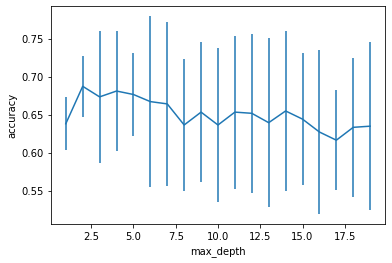

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [87]:
### Creating Confusion Matrix
from sklearn.metrics import confusion_matrix

d_pred_pass = t.predict(d_test_att)
species = np.array(d_test_pass)
predictions = np.array(d_pred_pass)
confusion_matrix(species, predictions)

array([[44, 30],
       [21, 54]], dtype=int64)

Confusion matrix, without normalization
[[44 30]
 [21 54]]


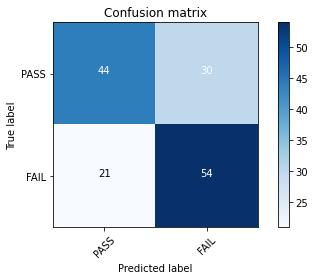

In [95]:
### Visualization of Confusion Matrix
# Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(d_test_pass, d_pred_pass)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PASS','FAIL'], title='Confusion matrix')

# Explain_Confusion Matrix
Among 149 test samples, PASS and FAIL were correctly predicted to be 44 and 54, respectively; thus, the accuracy was about 0.66. On the other hand, Type 1 error and Type 2 error were done by 30, 21 each.

Passing: 328 out of 649 (50.54%)
Accuracy of Training Set: 0.733
Accuracy of Test Set: 0.735
Confusion matrix, without normalization
[[ 8 10]
 [ 3 28]]


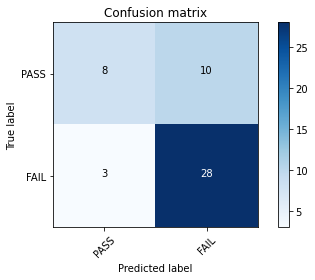

In [124]:
### Improving the accuracy
# shuffle rows
d = d.sample(frac=1)
# split training and testing data
d_train = d[:600]
d_test = d[600:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# number of passing students in whole dataset:
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

# fit a decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
t = t.fit(d_train_att, d_train_pass)
print("Accuracy of Training Set: {:.3f}".format(t.score(d_train_att, d_train_pass)))
print("Accuracy of Test Set: {:.3f}".format(t.score(d_test_att, d_test_pass)))

from sklearn.metrics import confusion_matrix
d_pred_pass = t.predict(d_test_att)
species = np.array(d_test_pass)
predictions = np.array(d_pred_pass)
confusion_matrix(species, predictions)

# Compute confusion matrix
cnf_matrix = confusion_matrix(d_test_pass, d_pred_pass)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PASS','FAIL'], title='Confusion matrix')

# Explain_Improving the accuracy
Using the 600 samples for train data instead of 500, and 49 samples for test data. It has more training set, thus it has increased accuracy. Also, to avoid overfitting problem, using the 4 depth instead of 5 depth, it has increased accuracy.